Import packages

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

Read CSV File

In [126]:
db = gpd.read_file("YOUR_FILE_HERE")
db.head()

,Label (Grouping),"San Mateo County, California!!Total!!Estimate","San Mateo County, California!!Total!!Margin of Error","San Mateo County, California!!Percent!!Estimate","San Mateo County, California!!Percent!!Margin of Error","San Mateo County, California!!Male!!Estimate","San Mateo County, California!!Male!!Margin of Error","San Mateo County, California!!Percent Male!!Estimate","San Mateo County, California!!Percent Male!!Margin of Error","San Mateo County, California!!Female!!Estimate",...,Census Tract 6135.01; San Mateo County; California!!Percent Female!!Estimate,Census Tract 6135.01; San Mateo County; California!!Percent Female!!Margin of Error,Census Tract 6135.02; San Mateo County; California!!Total!!Estimate,Census Tract 6135.02; San Mateo County; California!!Total!!Margin of Error,Census Tract 6135.02; San Mateo County; California!!Percent!!Estimate,Census Tract 6135.02; San Mateo County; California!!Percent!!Margin of Error,Census Tract 6135.02; San Mateo County; California!!Male!!Estimate,Census Tract 6135.02; San Mateo County; California!!Male!!Margin of Error,Census Tract 6135.02; San Mateo County; California!!Percent Male!!Estimate,geometry
0,Population 16 years and over with earnings,"434,597","Â±2,204","434,597","Â±2,204","233,282","Â±1,694","233,282","Â±1,694","201,315",...,"1,099",Â±208,"3,443",Â±536,"3,443",Â±536,"1,850",Â±377,"1,850",None
1,Â Â Â Â Median earnings (dollars),"68,872",Â±960,(X),(X),"75,083","Â±2,062",(X),(X),"60,614",...,(X),(X),"103,675","Â±16,849",(X),(X),"128,902","Â±34,077",(X),None
2,"Â Â Â Â FULL-TIME, YEAR-ROUND WORKERS WITH EAR...","295,902","Â±2,684","295,902","Â±2,684","169,736","Â±2,086","169,736","Â±2,086","126,166",...,690,Â±166,"2,452",Â±491,"2,452",Â±491,"1,398",Â±366,"1,398",None
3,"Â Â Â Â Â Â Â Â $1 to $9,999 or loss","3,179",Â±501,1.1%,Â±0.2,"1,634",Â±328,1.0%,Â±0.2,"1,545",...,9.4%,Â±13.3,16,Â±27,0.7%,Â±1.2,0,Â±19,0.0%,None
4,"Â Â Â Â Â Â Â Â $10,000 to $14,999","3,704",Â±588,1.3%,Â±0.2,"1,827",Â±371,1.1%,Â±0.2,"1,877",...,3.5%,Â±4.0,11,Â±17,0.4%,Â±0.7,0,Â±19,0.0%,None


Sample Pie Chart for "Full-Time, Year-Round Workers with Earnings"

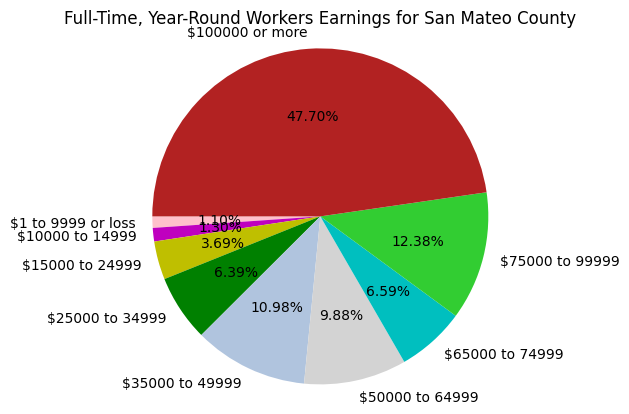

In [127]:
county_data = db['San Mateo County, California!!Percent!!Estimate']

chart_labels = ['$1 to 9999 or loss', '$10000 to 14999', '$15000 to 24999', 
                '$25000 to 34999', '$35000 to 49999', '$50000 to 64999', 
                '$65000 to 74999', '$75000 to 99999', '$100000 or more']
chart_data = [ county_data[3][0:len(county_data[3])-1], county_data[4][0:len(county_data[4])-1], 
              county_data[5][0:len(county_data[5])-1], county_data[6][0:len(county_data[6])-1], 
              county_data[7][0:len(county_data[7])-1], county_data[8][0:len(county_data[8])-1], 
              county_data[9][0:len(county_data[9])-1], county_data[10][0:len(county_data[10])-1], 
              county_data[11][0:len(county_data[11])-1] ]
colors = ['pink', 'm', 'y', 'g', 'lightsteelblue', 'lightgray', 'c', 'limegreen', 'firebrick']

plt.pie(chart_data, (0, 0, 0, 0, 0, 0, 0, 0, 0), chart_labels, colors, '%1.2f%%', startangle=180)
plt.axis('equal')
plt.title("Full-Time, Year-Round Workers Earnings for San Mateo County")
plt.show()


API Form

In [128]:
import requests

response = requests.get("https://api.census.gov/data/2022/acs/acs5/subject?get=group(S2001)&ucgid=pseudo(0500000US06081$1400000)")

#response.json()


Sample Map Visualization of Above Chart

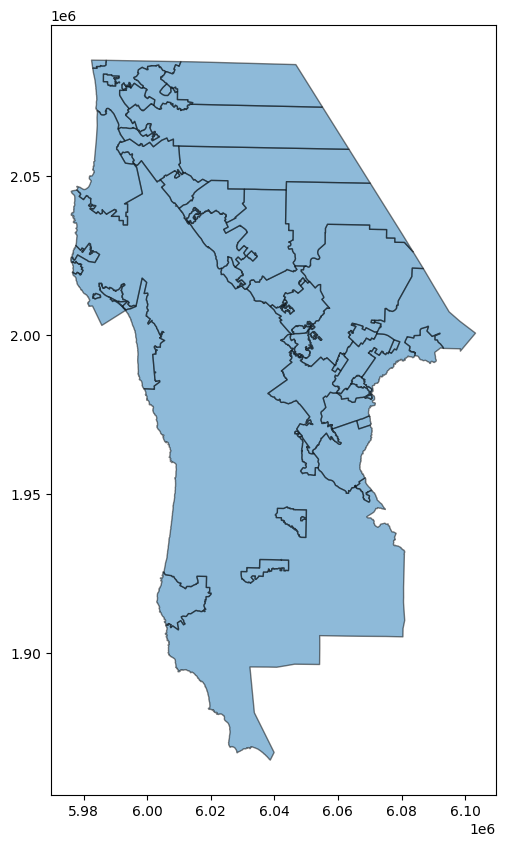

In [129]:
df = gpd.read_file('YOUR_FILE_HERE')

ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Map of San Mateo County by Median Income

In [130]:
# select particular columns -- only total values from Cenus Tracts
tract_income_data = db.filter(regex='Total!!Estimate')
tract_income_data = tract_income_data.drop(columns=['San Mateo County, California!!Total!!Estimate'])

tract_income_data.sort_values(by='Census Tract 6001; San Mateo County; California!!Total!!Estimate', ascending=False)

,Census Tract 6001; San Mateo County; California!!Total!!Estimate,Census Tract 6002; San Mateo County; California!!Total!!Estimate,Census Tract 6003; San Mateo County; California!!Total!!Estimate,Census Tract 6004.01; San Mateo County; California!!Total!!Estimate,Census Tract 6004.02; San Mateo County; California!!Total!!Estimate,Census Tract 6005.01; San Mateo County; California!!Total!!Estimate,Census Tract 6005.02; San Mateo County; California!!Total!!Estimate,Census Tract 6006; San Mateo County; California!!Total!!Estimate,Census Tract 6007.01; San Mateo County; California!!Total!!Estimate,Census Tract 6007.02; San Mateo County; California!!Total!!Estimate,...,Census Tract 6126; San Mateo County; California!!Total!!Estimate,Census Tract 6127; San Mateo County; California!!Total!!Estimate,Census Tract 6128; San Mateo County; California!!Total!!Estimate,Census Tract 6129; San Mateo County; California!!Total!!Estimate,Census Tract 6130; San Mateo County; California!!Total!!Estimate,Census Tract 6132; San Mateo County; California!!Total!!Estimate,Census Tract 6133; San Mateo County; California!!Total!!Estimate,Census Tract 6134; San Mateo County; California!!Total!!Estimate,Census Tract 6135.01; San Mateo County; California!!Total!!Estimate,Census Tract 6135.02; San Mateo County; California!!Total!!Estimate
19,"91,705","67,639","73,375","94,792","70,345","64,826","67,614","56,843","67,526","62,800",...,"148,407","112,500","178,125","116,435","115,833","154,391","129,821","137,292","115,921","116,528"
11,899,241,500,388,311,508,307,242,299,413,...,"1,102",509,845,"1,169",835,"1,387",534,683,856,"1,576"
7,89,297,282,269,410,237,280,512,231,97,...,30,14,29,44,22,204,34,60,79,94
15,"84,429","50,727","70,000","75,653","43,324","56,500","52,409","47,807","44,411","50,588",...,"116,373","149,286","208,750","158,563","135,417","119,590","116,765","133,438","85,313","113,939"
1,"76,902","44,982","63,689","51,060","43,306","48,869","47,404","46,446","41,982","46,370",...,"107,143","138,750","150,481","152,925","102,109","97,647","69,038","117,105","81,458","103,675"
4,57,68,7,137,50,0,60,0,0,8,...,0,0,13,11,35,0,39,20,24,11
18,"56,313","57,847","81,888","46,750","53,309","39,226",-,"51,094","43,379","29,816",...,-,-,"11,300","98,125","56,111","79,969",-,"68,000","80,250","77,006"
3,5,64,0,0,0,13,88,27,0,58,...,0,5,0,13,0,12,0,11,65,16
16,"42,083","40,298","32,838","45,680","36,806","43,026","43,462","36,250","23,273","45,592",...,"46,641",-,-,-,"21,394","43,438",-,-,"31,352","170,417"
5,37,30,12,12,51,306,172,117,130,106,...,12,44,5,14,0,134,4,28,10,34


Map of San Mateo County by Median Income V2


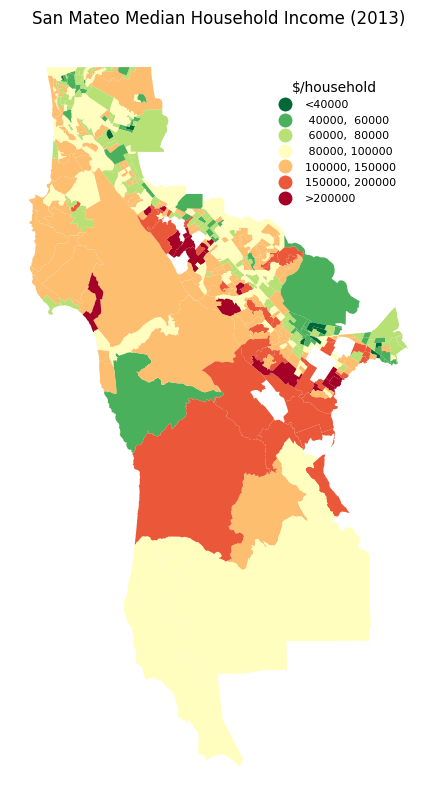

In [131]:
import mapclassify

tracts = gpd.read_file('YOUR_FILE_HERE')

# convert to tracts (not blocks)
col = tracts['GEOID10']

def noBlock(x):
    return int(str(x)[:-1])

new_tracts = col.apply(noBlock)

tracts['GEOID10'] = new_tracts

# plot map and legend
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

legend_kwds = {
    'loc' : 'upper right',
    'bbox_to_anchor' : (0.95, 0.95),
    'fmt' : '{:<5.0f}',
    'frameon' : False,
    'fontsize' : 8,
    'title' : '$/household'
}

classification_kwds = {
    'bins' : [40000, 60000, 80000, 100000, 150000, 200000]
}

tracts.plot(ax=ax, column='MedianHHin', cmap='RdYlGn_r', scheme='User_Defined', 
            classification_kwds=classification_kwds, legend=True, legend_kwds=legend_kwds)

ax.set_axis_off()

legend = ax.get_legend()
legend.texts[-1].set_text('>200000')
legend.texts[0].set_text('<40000')

ax.set_title('San Mateo Median Household Income (2013)')

plt.show()

Sample of Education Demographics

In [139]:
raw_edu = gpd.read_file("YOUR_FILE_HERE")

edu = raw_edu['San Mateo County, California!!Occupied housing units!!Estimate']

# keep rows 21 thru 24

0     262,122
1            
2            
3     123,564
4       5,174
5       2,255
6      79,960
7       2,208
8      20,330
9      28,631
10     47,372
11    116,889
12           
13     41,290
14     51,172
15     49,611
16     48,280
17     39,096
18     22,483
19     10,190
20           
21     18,413
22     32,104
23     54,953
24    156,652
25           
26     49,130
27     48,596
28     57,634
29     42,083
30     28,267
31     36,412
Name: San Mateo County, California!!Occupied housing units!!Estimate, dtype: object